In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('car_price.csv')

In [4]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [5]:
a = df['car_prices_in_rupee'].str.split(' ').values

In [6]:
a.shape

(5512,)

In [7]:
a[0][1]

'Lakh'

In [8]:
val = []
money = []
for i in range (0,5511):
    val.append(a[i][0])
    money.append(a[i][1])
    

In [9]:
data = {'val':val,'money':money}
d = pd.DataFrame(data = data)

In [10]:
d.head()

,val,money
0,10.03,Lakh
1,12.83,Lakh
2,16.40,Lakh
3,7.77,Lakh
4,5.15,Lakh


In [11]:
d['money'].value_counts()

Lakh     5332
          123
Crore      56
Name: money, dtype: int64

In [12]:
d[d['money']== '']

,val,money
238,"99,999",
243,"55,000",
342,"84,778",
675,"59,000",
734,"90,000",
...,...,...
5050,"82,642",
5094,"73,582",
5149,"59,736",
5177,"95,633",


In [13]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [14]:
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].str.replace(',','')

In [15]:

def Price_calc(price):
#     price.split(' ')
    if 'Lakh' in price.split(' ')[1]:
        return (float(price.split(' ')[0]))
    elif 'Crore' in price.split(' ')[1]:
        return (float(price.split(' ')[0])*100)
    else:
        return (float(price.split(' ')[0])/100000)

In [16]:
df['price'] = df['car_prices_in_rupee'].apply(Price_calc)

In [17]:
df['price'].describe()

count    5512.000000
mean       11.625096
std        19.699189
min         0.350000
25%         3.150000
50%         5.500000
75%        10.257500
max       192.000000
Name: price, dtype: float64

In [18]:
df.drop(columns=['car_prices_in_rupee'],inplace = True)

In [19]:
df.head()

,Unnamed: 0,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price
0,0,Jeep Compass 2.0 Longitude Option BSIV,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,10.03
1,1,Renault Duster RXZ Turbo CVT,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,12.83
2,2,Toyota Camry 2.5 G,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,16.40
3,3,Honda Jazz VX CVT,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,7.77
4,4,Volkswagen Polo 1.2 MPI Highline,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,5.15


In [20]:
df['kms_driven']=df['kms_driven'].str.replace('kms','')

In [21]:
df['kms_driven']=df['kms_driven'].str.replace(',','')

In [22]:
df['kms_driven'] = df['kms_driven'].astype('int')

In [24]:
df['kms_driven'].describe()

count      5512.000000
mean      63211.888062
std       41844.131167
min         250.000000
25%       33151.750000
50%       59000.000000
75%       84265.250000
max      560000.000000
Name: kms_driven, dtype: float64

In [25]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [26]:
df.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,10.03
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,12.83
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,16.40
3,Honda Jazz VX CVT,26696,Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,7.77
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,5.15


In [27]:
df['engine'] = df['engine'].str.replace('cc','').astype('int')

In [28]:
df['Seats'] = df['Seats'].str.replace('Seats','').astype('int')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      5512 non-null   object 
 1   kms_driven    5512 non-null   int32  
 2   fuel_type     5512 non-null   object 
 3   transmission  5512 non-null   object 
 4   ownership     5512 non-null   object 
 5   manufacture   5512 non-null   int64  
 6   engine        5512 non-null   int32  
 7   Seats         5512 non-null   int32  
 8   price         5512 non-null   float64
dtypes: float64(1), int32(3), int64(1), object(4)
memory usage: 323.1+ KB


In [30]:
df['ownership'].value_counts()

1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: ownership, dtype: int64

In [31]:
def find_ownership(owner):
    if '1' in owner:
        return 1
    elif '2' in owner:
        return 2
    elif '3' in owner:
        return 3
    elif '4' in owner:
        return 4
    elif '5' in owner:
        return 5
    else:
        return 0
    

In [32]:
df['owner'] = df['ownership'].apply(find_ownership)

In [33]:
df.drop(columns=['ownership'], inplace = True)

In [34]:
df.corr()['price']

kms_driven    -0.242475
manufacture    0.351760
engine         0.164781
Seats          0.006138
price          1.000000
owner         -0.159079
Name: price, dtype: float64

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='owner', ylabel='price'>

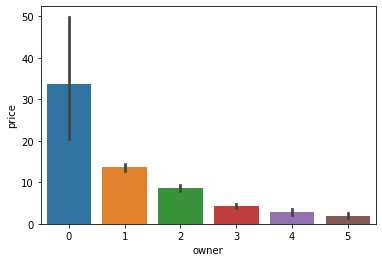

In [36]:
sns.barplot(x = df['owner'], y = df['price'])

<AxesSubplot:xlabel='Seats', ylabel='price'>

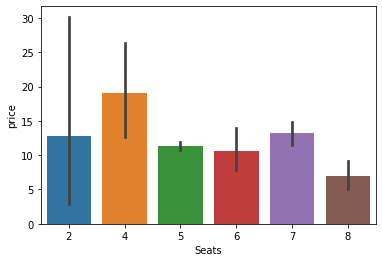

In [37]:
sns.barplot(x = df['Seats'], y = df['price'])

<AxesSubplot:>

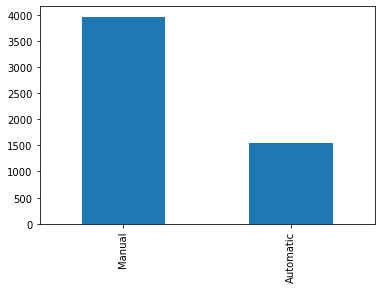

In [38]:
df['transmission'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='transmission', ylabel='price'>

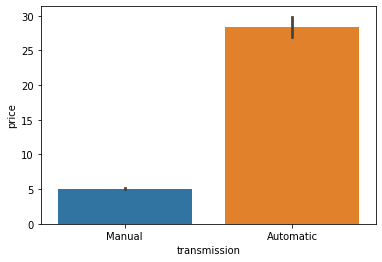

In [39]:
sns.barplot(x = df['transmission'], y = df['price'])

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

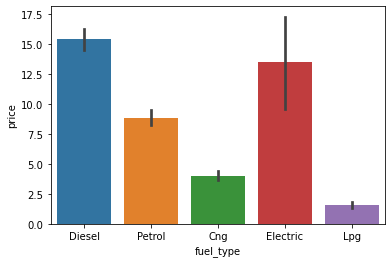

In [40]:
sns.barplot(x = df['fuel_type'], y = df['price'])

<AxesSubplot:xlabel='manufacture', ylabel='price'>

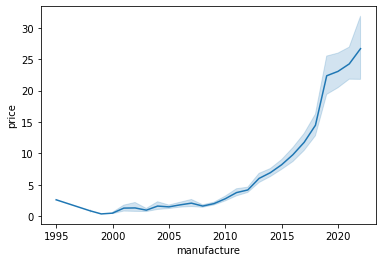

In [41]:
sns.lineplot(x = df['manufacture'], y = df['price'])

<AxesSubplot:xlabel='kms_driven', ylabel='price'>

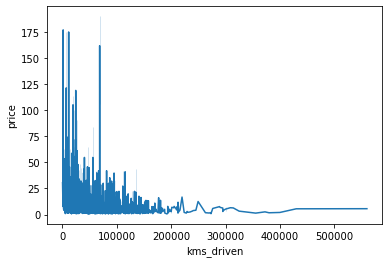

In [42]:
sns.lineplot(x = df['kms_driven'], y = df['price'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

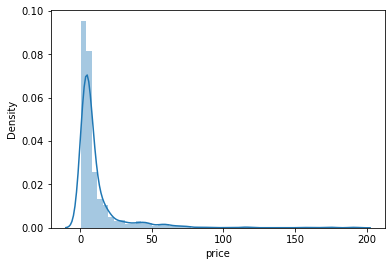

In [43]:
sns.distplot(df['price'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

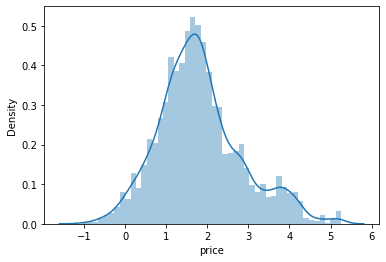

In [44]:
sns.distplot((np.log(df['price'])))

In [45]:
df.head()

,car_name,kms_driven,fuel_type,transmission,manufacture,engine,Seats,price,owner
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,2017,1956,5,10.03,1
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,2021,1330,5,12.83,1
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,2016,2494,5,16.40,1
3,Honda Jazz VX CVT,26696,Petrol,Automatic,2018,1199,5,7.77,1
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,2016,1199,5,5.15,1


In [46]:
df['company'] = df['car_name'].str.split(' ',n=1,expand = True)[0].values

In [47]:
df.head()

,car_name,kms_driven,fuel_type,transmission,manufacture,engine,Seats,price,owner,company
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,2017,1956,5,10.03,1,Jeep
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,2021,1330,5,12.83,1,Renault
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,2016,2494,5,16.40,1,Toyota
3,Honda Jazz VX CVT,26696,Petrol,Automatic,2018,1199,5,7.77,1,Honda
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,2016,1199,5,5.15,1,Volkswagen


In [48]:
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='company', ylabel='price'>

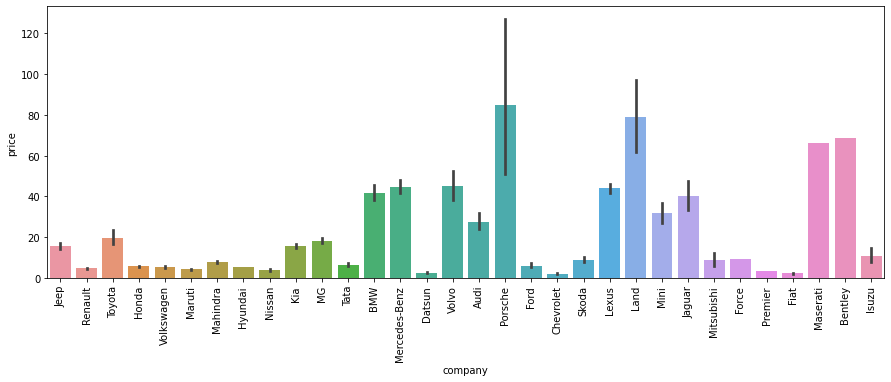

In [49]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 'vertical')
sns.barplot(x = df['company'], y = df['price'])

In [50]:
df['model'] = df['car_name'].str.split(' ',n=1,expand = True)[1].str.split(' ',n=1,expand = True)[0].values

In [51]:
def bmw_model(name):
    if 'BMW' in name and ('5' in name or '3' in name or '2' in name or '7' in name or '6' in name or 'M' in name) and 'X' not in name:
        return ' Series'
    elif 'BMW' in name and 'X1' in name:
        return ' sDrive'
    elif 'BMW' in name:
        return ' xDrive'
    else:
        return ''
        
    

In [52]:
df['temp'] = df['car_name'].apply(bmw_model)

In [53]:
df['car_model'] = df['model'] + df['temp']

In [54]:
df.sample(5)

,car_name,kms_driven,fuel_type,transmission,manufacture,engine,Seats,price,owner,company,model,temp,car_model
4814,Hyundai i20 Asta 1.2,75317,Petrol,Manual,2014,1498,5,4.35,2,Hyundai,i20,,i20
590,Hyundai Creta 1.6 SX Automatic,39000,Petrol,Automatic,2017,1582,5,10.00,2,Hyundai,Creta,,Creta
4150,Tata Harrier Camo XZ Plus,7585,Diesel,Manual,2021,1197,5,15.61,1,Tata,Harrier,,Harrier
3958,Mahindra XUV500 W9 2WD,94165,Diesel,Manual,2017,2982,5,9.74,1,Mahindra,XUV500,,XUV500
3455,BMW 3 Series 320d,145228,Diesel,Automatic,2010,2993,5,5.19,1,BMW,3,Series,3 Series


In [55]:
df.drop(columns=['model','temp'],inplace = True)

In [56]:
df.head()

,car_name,kms_driven,fuel_type,transmission,manufacture,engine,Seats,price,owner,company,car_model
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,2017,1956,5,10.03,1,Jeep,Compass
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,2021,1330,5,12.83,1,Renault,Duster
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,2016,2494,5,16.40,1,Toyota,Camry
3,Honda Jazz VX CVT,26696,Petrol,Automatic,2018,1199,5,7.77,1,Honda,Jazz
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,2016,1199,5,5.15,1,Volkswagen,Polo


In [57]:
df['car_model'].value_counts()

Swift     388
i20       237
City      221
Wagon     206
Alto      192
         ... 
Quanto      1
MU          1
Logan       1
e2o         1
Sonata      1
Name: car_model, Length: 231, dtype: int64

In [58]:
company_index = df[df['company']=='Toyota'].index

In [245]:
df['car_model'][company_index].unique()

array(['Camry', 'Corolla', 'Innova', 'Etios', 'Fortuner', 'Land', 'Urban',
       'prado', 'Glanza', 'Yaris', 'Qualis', 'Platinum'], dtype=object)

In [60]:
model_index = df[df['car_model']=='Compass'].index

In [244]:
df['car_name'][model_index].unique()

array(['Jeep Compass 2.0 Longitude Option BSIV',
       'Jeep Compass 1.4 Limited Plus BSIV',
       'Jeep Compass 2.0 Limited Plus BSIV', 'Jeep Compass 2.0 Limited',
       'Jeep Compass 1.4 Sport', 'Jeep Compass 1.4 Limited Plus',
       'Jeep Compass Model S 4X4 Diesel AT',
       'Jeep Compass 2.0 Limited Plus AT',
       'Jeep Compass 2.0 Sport Plus BSIV', 'Jeep Compass Model S DCT',
       'Jeep Compass 2.0 Limited 4X4 Opt Diesel AT',
       'Jeep Compass 1.4 Sport Plus BSIV',
       'Jeep Compass 1.4 Limited Opt DCT',
       'Jeep Compass 2.0 Limited Option 4X4',
       'Jeep Compass 2.0 Limited 4X4', 'Jeep Compass 2.0 Limited Option',
       'Jeep Compass 2.0 Longitude BSIV', 'Jeep Compass 1.4 Limited',
       'Jeep Compass 1.4 Longitude Plus AT', 'Jeep Compass 2.0 Sport',
       'Jeep Compass 1.4 Longitude Option BSIV',
       'Jeep Compass 2.0 Limited Plus',
       'Jeep Compass 2.0 Limited Option 4X4 Black',
       'Jeep Compass 2.0 Longitude Option'], dtype=object)

In [62]:
df.head()

,car_name,kms_driven,fuel_type,transmission,manufacture,engine,Seats,price,owner,company,car_model
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,2017,1956,5,10.03,1,Jeep,Compass
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,2021,1330,5,12.83,1,Renault,Duster
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,2016,2494,5,16.40,1,Toyota,Camry
3,Honda Jazz VX CVT,26696,Petrol,Automatic,2018,1199,5,7.77,1,Honda,Jazz
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,2016,1199,5,5.15,1,Volkswagen,Polo


In [65]:
df['gear'] = df['transmission'].apply(lambda x:1 if 'Manual' in x else 0) 
# 1 for manual
# 0 for automatic

In [66]:
df.head()

,car_name,kms_driven,fuel_type,transmission,manufacture,engine,Seats,price,owner,company,car_model,gear
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,2017,1956,5,10.03,1,Jeep,Compass,1
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,2021,1330,5,12.83,1,Renault,Duster,0
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,2016,2494,5,16.40,1,Toyota,Camry,0
3,Honda Jazz VX CVT,26696,Petrol,Automatic,2018,1199,5,7.77,1,Honda,Jazz,0
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,2016,1199,5,5.15,1,Volkswagen,Polo,1


In [67]:
df.corr()['price']

kms_driven    -0.242475
manufacture    0.351760
engine         0.164781
Seats          0.006138
price          1.000000
owner         -0.159079
gear          -0.532867
Name: price, dtype: float64

In [68]:
import re

In [86]:
df['name'] =df['car_name'].astype('string')

In [87]:
df.head()

,car_name,kms_driven,fuel_type,transmission,manufacture,engine,Seats,price,owner,company,car_model,gear,name
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,2017,1956,5,10.03,1,Jeep,Compass,1,Jeep Compass 2.0 Longitude Option BSIV
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,2021,1330,5,12.83,1,Renault,Duster,0,Renault Duster RXZ Turbo CVT
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,2016,2494,5,16.40,1,Toyota,Camry,0,Toyota Camry 2.5 G
3,Honda Jazz VX CVT,26696,Petrol,Automatic,2018,1199,5,7.77,1,Honda,Jazz,0,Honda Jazz VX CVT
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,2016,1199,5,5.15,1,Volkswagen,Polo,1,Volkswagen Polo 1.2 MPI Highline


In [164]:
pattern1 = 'Jeep|Compass'

In [166]:
re.split(pattern1,df['name'][0])

['', ' ', ' 2.0 Longitude Option BSIV']

In [167]:
def car_variant(name):
    s1 = name.split(' ')[0]
    s2 = name.split(' ')[1]
    pattern = s1 + '|' + s2
    return re.split(pattern,name)[2]

    

In [169]:
df['variant'] = df['name'].apply(car_variant)

In [170]:
df.head()

,car_name,kms_driven,fuel_type,transmission,manufacture,engine,Seats,price,owner,company,car_model,gear,name,variant
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,2017,1956,5,10.03,1,Jeep,Compass,1,Jeep Compass 2.0 Longitude Option BSIV,2.0 Longitude Option BSIV
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,2021,1330,5,12.83,1,Renault,Duster,0,Renault Duster RXZ Turbo CVT,RXZ Turbo CVT
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,2016,2494,5,16.40,1,Toyota,Camry,0,Toyota Camry 2.5 G,2.5 G
3,Honda Jazz VX CVT,26696,Petrol,Automatic,2018,1199,5,7.77,1,Honda,Jazz,0,Honda Jazz VX CVT,VX CVT
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,2016,1199,5,5.15,1,Volkswagen,Polo,1,Volkswagen Polo 1.2 MPI Highline,1.2 MPI Highline


In [172]:
df.drop(columns=['name'],inplace = True)

In [173]:
df.head()

,car_name,kms_driven,fuel_type,transmission,manufacture,engine,Seats,price,owner,company,car_model,gear,variant
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,2017,1956,5,10.03,1,Jeep,Compass,1,2.0 Longitude Option BSIV
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,2021,1330,5,12.83,1,Renault,Duster,0,RXZ Turbo CVT
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,2016,2494,5,16.40,1,Toyota,Camry,0,2.5 G
3,Honda Jazz VX CVT,26696,Petrol,Automatic,2018,1199,5,7.77,1,Honda,Jazz,0,VX CVT
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,2016,1199,5,5.15,1,Volkswagen,Polo,1,1.2 MPI Highline


In [174]:
df['variant'].value_counts()

 Series                  76
 VXI                     68
 800 LXI                 53
 VDI                     44
 R VXI BS IV             43
                         ..
 J CVT                    1
 D4                       1
 110PS Diesel RxZ AMT     1
 XL Option CVT            1
 CRDi 1.6 SX Option       1
Name: variant, Length: 1713, dtype: int64

In [175]:
# Now feature engineering is done, lets create model

In [225]:
x = df.drop(columns=['price','car_name','transmission'])

In [226]:
y = np.log(df['price'])

In [227]:
y

0       2.305581
1       2.551786
2       2.797281
3       2.050270
4       1.638997
          ...   
5507    3.363842
5508    4.172848
5509    2.621039
5510    3.397858
5511    3.462606
Name: price, Length: 5512, dtype: float64

In [180]:
from sklearn.model_selection import train_test_split

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state = 2)

In [229]:
x_train

,kms_driven,fuel_type,manufacture,engine,Seats,owner,company,car_model,gear,variant
4763,68000,Diesel,2014,2354,5,1,Volkswagen,Vento,1,Diesel Highline
4081,39592,Petrol,2017,1995,5,1,Maruti,Swift,1,Dzire VXI
91,29900,Petrol,2015,1197,5,1,Hyundai,Grand,1,i10 Magna
4470,90000,Petrol,2013,1197,5,4,Maruti,Ertiga,1,VXI
1277,13000,Diesel,2014,1353,5,2,Mercedes-Benz,S-Class,0,S 350 d
...,...,...,...,...,...,...,...,...,...,...
3335,110000,Diesel,2016,998,4,1,Tata,Indica,1,eV2 LS
1099,39356,Diesel,2015,2143,5,1,Audi,Q3,0,35 TDI Quattro Premium Plus
2514,26000,Petrol,2018,1197,5,1,Honda,Jazz,1,V
3606,70000,Petrol,2008,1497,5,4,Chevrolet,Optra,1,1.6 LS Petrol


In [183]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [184]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor

In [230]:
x_train.head(1)

,kms_driven,fuel_type,manufacture,engine,Seats,owner,company,car_model,gear,variant
4763,68000,Diesel,2014,2354,5,1,Volkswagen,Vento,1,Diesel Highline


# Linear Regression

In [231]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse = False,drop = 'first',handle_unknown='ignore'),[1,6,7,9])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2 score ', r2_score(y_test,y_pred))
print('MAE ', mean_absolute_error(y_test,y_pred))


r2 score  -1943743295.140603
MAE  3860.407148396448


C:\Users\asus\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Random Forest

In [232]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse = False,drop = 'first',handle_unknown='ignore'),[1,6,7,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators= 110, random_state=4,max_samples=0.49,max_features=0.75,max_depth=25)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('r2 score ', r2_score(y_test,y_pred))
print('MAE ', mean_absolute_error(y_test,y_pred))


r2 score  0.9274340752718727
MAE  0.2019592088157917


C:\Users\asus\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [234]:
x_train.head(1)

,kms_driven,fuel_type,manufacture,engine,Seats,owner,company,car_model,gear,variant
4763,68000,Diesel,2014,2354,5,1,Volkswagen,Vento,1,Diesel Highline


In [239]:
query = np.array([68000,'petrol',2017,1197,5,1,'Volkswagon','Vento',0,'1.2 TSI Highline AT'])
query = query.reshape(1,10)

In [240]:
import pickle

In [241]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [242]:
import sklearn

In [243]:
print(sklearn.__version__)

1.0.2


In [246]:
df.head()

,car_name,kms_driven,fuel_type,transmission,manufacture,engine,Seats,price,owner,company,car_model,gear,variant
0,Jeep Compass 2.0 Longitude Option BSIV,86226,Diesel,Manual,2017,1956,5,10.03,1,Jeep,Compass,1,2.0 Longitude Option BSIV
1,Renault Duster RXZ Turbo CVT,13248,Petrol,Automatic,2021,1330,5,12.83,1,Renault,Duster,0,RXZ Turbo CVT
2,Toyota Camry 2.5 G,60343,Petrol,Automatic,2016,2494,5,16.40,1,Toyota,Camry,0,2.5 G
3,Honda Jazz VX CVT,26696,Petrol,Automatic,2018,1199,5,7.77,1,Honda,Jazz,0,VX CVT
4,Volkswagen Polo 1.2 MPI Highline,69414,Petrol,Manual,2016,1199,5,5.15,1,Volkswagen,Polo,1,1.2 MPI Highline
